In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

# Suppressing annoying harmless error
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)
warnings.simplefilter('ignore')

In [4]:
# We read the consumer price index (CPI) data from this website: https://fred.stlouisfed.org/series/CPIAUCSL
cpi_data = pd.read_excel('Downloads/CPIAUCSL.xls', skiprows=10)

# Remove NA's
cpi_data.dropna(inplace=True)

In [5]:
cpi_data.head()

,observation_date,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [6]:
cpi_data.index = pd.to_datetime(cpi_data.observation_date)
cpi_data.drop(['observation_date'], axis=1, inplace=True)
cpi_data.rename(columns={'CPIAUCSL': 'cpi'}, inplace=True)
cpi_data.head()

,cpi
observation_date,
1947-01-01,21.48
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95


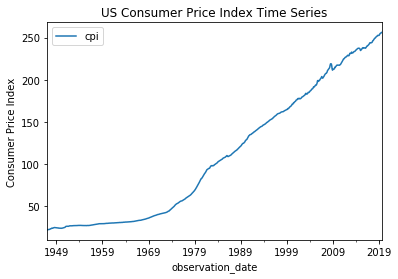

In [7]:
cpi_data.plot()
plt.title('US Consumer Price Index Time Series')
plt.ylabel('Consumer Price Index')
plt.show()

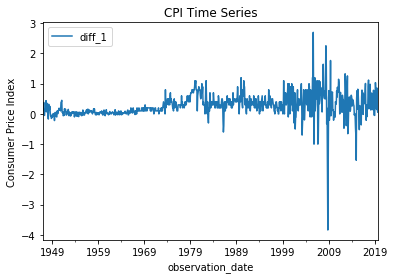

In [8]:
cpi_data['diff_1'] = cpi_data.cpi - cpi_data.cpi.shift()
cpi_data.plot(y='diff_1')
plt.title('CPI Time Series')
plt.ylabel("Consumer Price Index")
plt.show()

Text(0.5, 1.0, 'US CPI PACF')

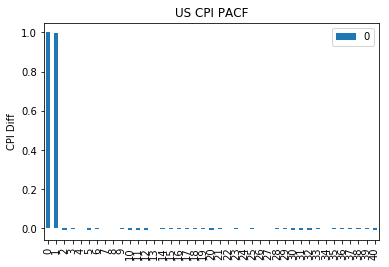

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(cpi_data.cpi))
x_acf.plot(kind='bar')
plt.ylabel('CPI Diff')
plt.title("US CPI PACF")

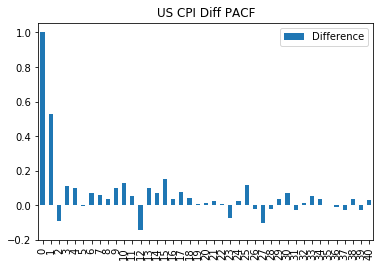

In [10]:
x_acf = pd.DataFrame(pacf(cpi_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("US CPI Diff PACF")
plt.legend(['Difference'])

In [11]:
cpi_data.head()

,cpi,diff_1
observation_date,,
1947-01-01,21.48,NaN
1947-02-01,21.62,0.14
1947-03-01,22.00,0.38
1947-04-01,22.00,0.00
1947-05-01,21.95,-0.05


In [12]:
# Run various ARIMA models to see which p, d and q values fit the best
# Pick the one with lowest AIC

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cpi_data.cpi, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.cpi   No. Observations:                  872
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -408.560
Method:                           css   S.D. of innovations              0.387
Date:                Tue, 05 Nov 2019   AIC                            821.120
Time:                        10:18:08   BIC                            830.662
Sample:                    02-01-1947   HQIC                           824.771
                         - 09-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.013     20.575      0.000       0.244       0.295
Residuals Description
count    8.720000e+02
mean     1.518978e-09
std      3.868058e-01
min     -4.111356e+00
25%     -2.098555e-01

C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(cpi_data.cpi, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.cpi   No. Observations:                  872
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -261.913
Method:                       css-mle   S.D. of innovations              0.327
Date:                Tue, 05 Nov 2019   AIC                            531.826
Time:                        10:19:07   BIC                            550.910
Sample:                    02-01-1947   HQIC                           539.127
                         - 09-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2690      0.021     12.623      0.000       0.227       0.311
ar.L1.D.cpi     0.3663      0.058      6.271      0.000       0.252       0.481
ma.L1.D.cpi     0.2218      0.061      3.609    

In [14]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(cpi_data.cpi, order=(5,1,5))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.cpi   No. Observations:                  872
Model:                 ARIMA(5, 1, 5)   Log Likelihood                -231.001
Method:                       css-mle   S.D. of innovations              0.315
Date:                Tue, 05 Nov 2019   AIC                            486.002
Time:                        10:20:13   BIC                            543.252
Sample:                    02-01-1947   HQIC                           507.905
                         - 09-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2605      0.084      3.112      0.002       0.096       0.424
ar.L1.D.cpi     1.1015      0.255      4.316      0.000       0.601       1.602
ar.L2.D.cpi    -1.0595      0.459     -2.306    

Text(0.5, 1.0, 'Histogram of CPI Residuals')

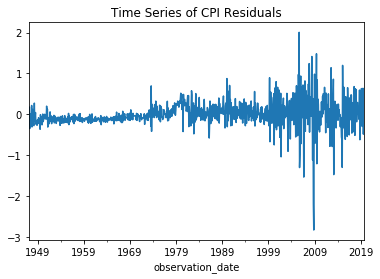

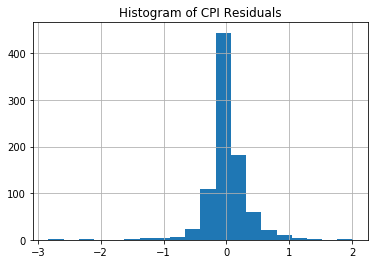

In [15]:
# Plot the residuals i.e the actual - predicted

residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of CPI Residuals')

residuals.hist(bins=20)
plt.title('Histogram of CPI Residuals')

In [16]:
cpi_data[cpi_data.isnull().any(axis=1)]

,cpi,diff_1
observation_date,,
1947-01-01,21.48,NaN


In [17]:
train_cpi = cpi_data.cpi[:650]
test_cpi = cpi_data.cpi[650:]

In [18]:
cpi_data.cpi

observation_date
1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
1947-06-01     22.080
1947-07-01     22.230
1947-08-01     22.400
1947-09-01     22.840
1947-10-01     22.910
1947-11-01     23.060
1947-12-01     23.410
1948-01-01     23.680
1948-02-01     23.670
1948-03-01     23.500
1948-04-01     23.820
1948-05-01     24.010
1948-06-01     24.150
1948-07-01     24.400
1948-08-01     24.430
1948-09-01     24.360
1948-10-01     24.310
1948-11-01     24.160
1948-12-01     24.050
1949-01-01     24.010
1949-02-01     23.910
1949-03-01     23.910
1949-04-01     23.920
1949-05-01     23.910
1949-06-01     23.920
               ...   
2017-04-01    244.051
2017-05-01    243.962
2017-06-01    244.182
2017-07-01    244.390
2017-08-01    245.297
2017-09-01    246.418
2017-10-01    246.587
2017-11-01    247.332
2017-12-01    247.901
2018-01-01    248.884
2018-02-01    249.369
2018-03-01    249.498
2018-04-01    249.956
2018-05-01    2

In [19]:
model = ARIMA(train_cpi, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

pred = model_fit.predict(start=len(train_cpi), end=len(train_cpi) + 220)

C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Jmich\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [20]:
pred

2001-03-01    0.267053
2001-04-01    0.264158
2001-05-01    0.435903
2001-06-01    0.616994
2001-07-01    0.270988
2001-08-01    0.026737
2001-09-01    0.322744
2001-10-01    0.581972
2001-11-01   -0.174547
2001-12-01    0.263821
2002-01-01    0.179935
2002-02-01    0.300664
2002-03-01    0.374934
2002-04-01    0.390643
2002-05-01    0.503889
2002-06-01    0.142066
2002-07-01    0.240602
2002-08-01    0.444649
2002-09-01    0.367789
2002-10-01    0.262792
2002-11-01    0.362823
2002-12-01    0.294966
2003-01-01    0.320797
2003-02-01    0.592880
2003-03-01    0.582164
2003-04-01    0.191906
2003-05-01   -0.182204
2003-06-01    0.181753
2003-07-01    0.355998
2003-08-01    0.474723
                ...   
2017-02-01    0.631042
2017-03-01    0.160991
2017-04-01    0.056438
2017-05-01    0.332895
2017-06-01    0.045788
2017-07-01    0.390547
2017-08-01    0.316363
2017-09-01    0.515040
2017-10-01    0.583092
2017-11-01    0.107953
2017-12-01    0.651916
2018-01-01    0.386084
2018-02-01 

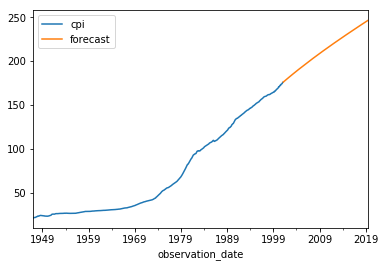

In [21]:
fig, ax = plt.subplots()
ax = train_cpi.plot()
fig = model_fit.plot_predict(start = '2001-03-01', end= '2019-07-01', dynamic=True, ax=ax,plot_insample=False)
plt.show()

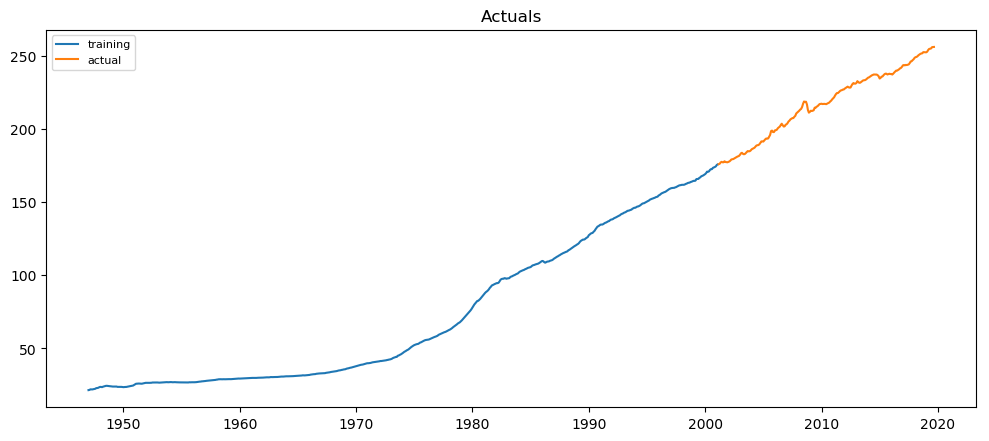

In [22]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_cpi, label='training')
plt.plot(test_cpi, label='actual')
plt.title('Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

AttributeError: 'tuple' object has no attribute 'figure'

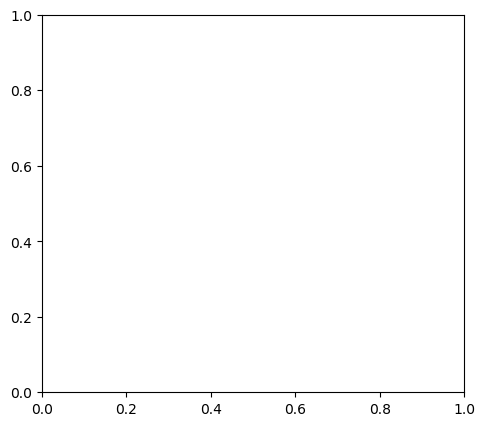

In [23]:
plt.figure(figsize=(12,5), dpi=100)
plt.subplot(1,2,1)
ax = plt.axis()
model_fit.plot_predict(start = '2001-03-01', end= '2019-07-01', dynamic=True, ax=ax,plot_insample=False)

plt.subplot(1,2,2)
plt.plot(train_cpi, label='training')
plt.plot(test_cpi, label='actual')
plt.title('Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()

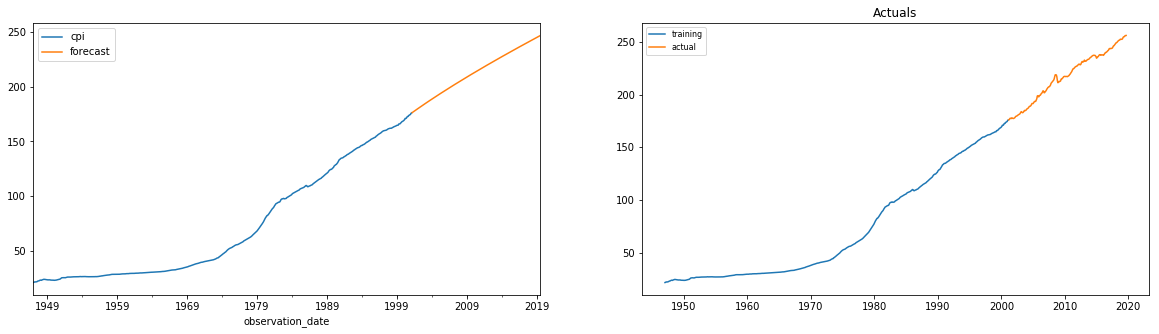

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

train_cpi.plot(ax=ax1)
model_fit.plot_predict(start = '2001-03-01', end= '2019-07-01', dynamic=True, ax=ax1, plot_insample=False)

plt.plot(train_cpi, label='training')
plt.plot(test_cpi, label='actual')
plt.title('Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()

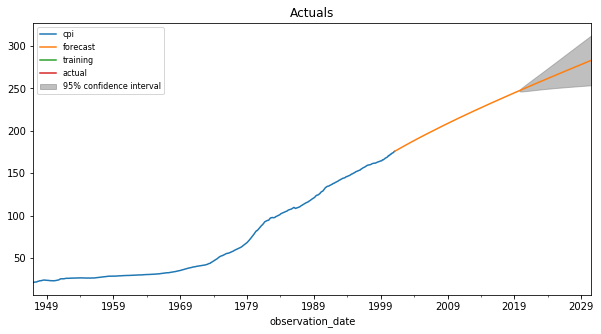

In [25]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))

train_cpi.plot(ax=ax)
model_fit.plot_predict(start = '2001-03-01', end= '2030-07-01', dynamic=True, ax=ax, plot_insample=False)
plt.plot(train_cpi, label='training')
plt.plot(test_cpi, label='actual')
plt.title('Actuals')
plt.legend(loc='upper left', fontsize=8)

plt.show()